In [129]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
df = pd.read_csv('XAUUSDDaily.csv', sep = '\t')

In [3]:
df.head();

In [4]:
%%capture
df.info()

In [5]:
df.columns

Index(['Date ', ' Open ', ' High ', ' Low ', ' Close ', ' Volume'], dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df=df.sort_values('Date')

In [11]:
df.head();

In [12]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [13]:
df.head();

In [14]:
df.describe();


In [15]:
decomposition = seasonal_decompose(df['Open'], model='additive', period=365)

In [16]:
df1 = pd.read_csv('zomato.csv', encoding = 'latin-1')

In [17]:
df1.head();

In [18]:
df1.columns;

In [19]:
%%capture
df1.info();

In [20]:
df1.isnull().sum();

In [21]:
[features for features in df1.columns if df1[features].isnull().sum() > 0]

['Cuisines']

In [22]:
df=df1

In [23]:
df.head();

In [24]:
df.columns;

In [25]:
[features for features in df.columns if df[features].isnull().sum() > 0];

In [26]:
df_country = pd.read_excel('Country-code.xlsx')
df_country.head();

In [27]:
realdf = pd.merge(df,df_country, on='Country Code', how='left');

In [172]:
realdf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
countries = realdf.Country.value_counts().index

In [290]:
country_value = realdf.Country.value_counts().values

In [292]:
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1ec903a1ac0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.4%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.7%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.9%')])

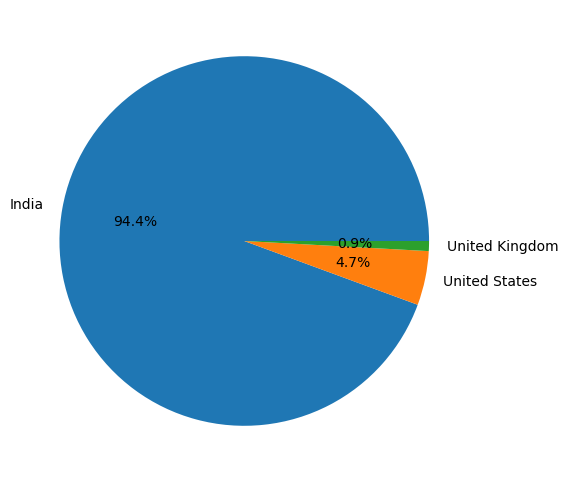

In [336]:
plt.pie(country_value[:3],labels = countries[:3], autopct = '%1.1f%%')

In [32]:
realdf.dtypes;

In [33]:
realdf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [94]:
rating = realdf.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = {0:'Rating Count'})


In [332]:
rating;

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

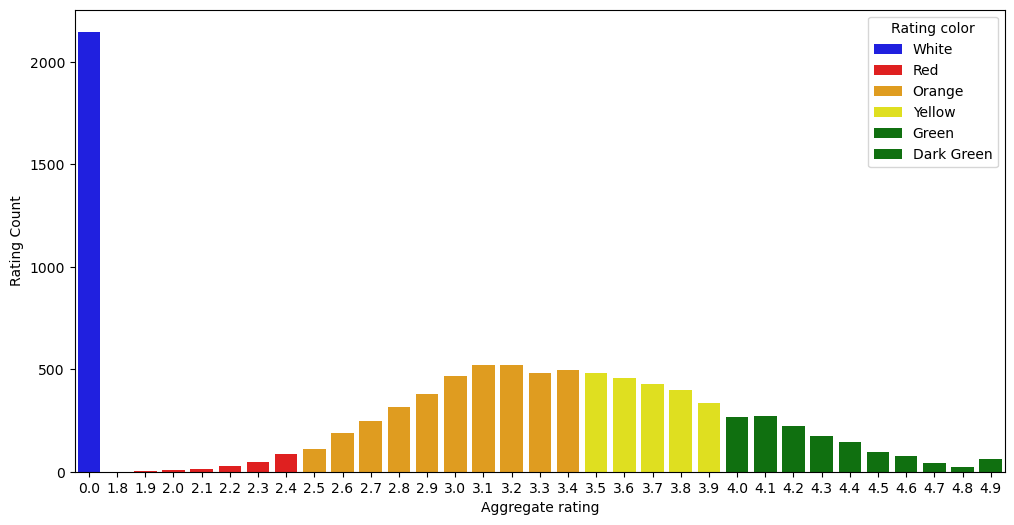

In [166]:
mp.rcParams['figure.figsize'] = (12,6)
sns.barplot(x= 'Aggregate rating', y= 'Rating Count', data = rating, hue= 'Rating color', palette= ['Blue', 'Red', 'Orange', 'Yellow', 'Green', 'Green'])

In [177]:
realdf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [248]:
realdf.groupby(['Aggregate rating','Country']).size().reset_index().head(4);

In [252]:
realdf[realdf['Aggregate rating'] == 0].groupby('Country').size().reset_index();

In [264]:
realdf.groupby(['Currency','Country']).size().reset_index();

In [288]:
realdf[realdf['Has Online delivery']=='Yes'].Country.value_counts();

In [316]:
city = realdf['City'].value_counts().index

In [352]:
city_count = realdf['City'].value_counts().values

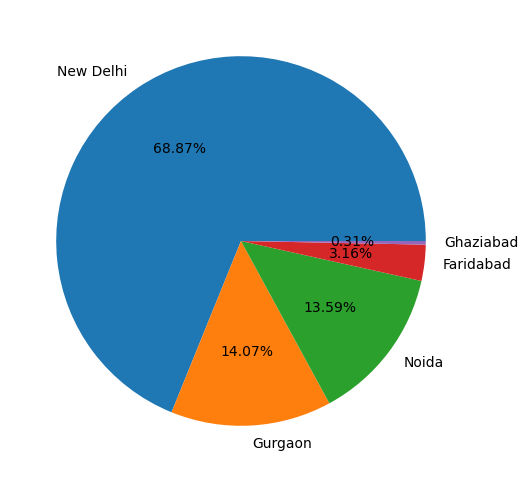

In [368]:
plt.pie(city_count[:5], labels = city[:5], autopct= '%1.2f%%');

In [400]:
##Find top 10 Cousines
foodcount = realdf['Cuisines'].value_counts().values

In [406]:
food = realdf['Cuisines'].value_counts().index

([<matplotlib.patches.Wedge at 0x1ec980ffec0>,
 [Text(0.22530318485741765, 1.0766793742303715, 'North Indian'),
  Text(-1.0397945822187122, -0.35892509913436504, 'North Indian, Chinese'),
  Text(0.02485361207687513, -1.0997191905058001, 'Chinese'),
  Text(0.9567434703810609, -0.5428092960545208, 'Fast Food')],
 [Text(0.12289264628586416, 0.5872796586711116, '43.43%'),
  Text(-0.5671606812102067, -0.19577732680056273, '23.71%'),
  Text(0.013556515678295524, -0.5998468311849818, '16.43%'),
  Text(0.5218600747533059, -0.2960777978479204, '16.43%')])

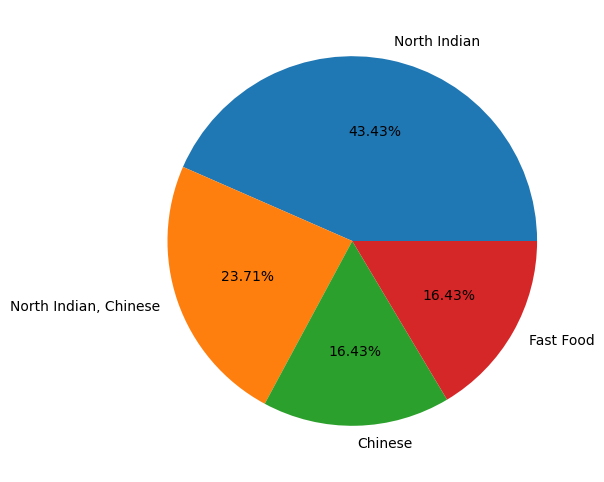

In [424]:
plt.pie(foodcount[:4], labels = food[:4], autopct = '%1.2f%%')